# FDM Mini Project - Group 09

### HR Analytics: Job Change of Data Scientists

<img src='https://blog.itsyourskills.com/wp-content/uploads/2020/01/HR-Analytics.jpg' width=600 />

## About Dataset

### Context and Content

This dataset pertains to a company specializing in Big Data and Data Science, aiming to hire data scientists from individuals who successfully complete company-conducted courses. Many individuals sign up for these training programs. The company is interested in identifying candidates who are genuinely committed to working for the company after training, as opposed to those seeking new employment opportunities. This distinction helps reduce costs, optimize training quality, course planning, and candidate categorization. The dataset contains information related to demographics, education, and experience gathered during candidate sign-up and enrollment.

The dataset's primary objective is to understand the factors influencing a person's decision to leave their current job, making it valuable for HR research. Using the dataset's credentials, demographics, and experience data, you can predict the probability of a candidate seeking new employment or remaining with the company. Additionally, it allows for interpreting the factors that influence employees' decisions.

The dataset is divided into training and test sets. The test set does not include the target variable, but a test target values data file is provided for related tasks. A sample submission corresponds to the enrollee_id of the test set and includes columns for enrollee_id and target.

**Note:**

- The dataset exhibits class imbalance.
- Most features are categorical (Nominal, Ordinal, Binary), with some having high cardinality.
- Missing value imputation may be required as part of your data preprocessing pipeline.

**Features**

1. enrollee_id: Unique ID for the candidate
2. city: City code
3. city_development_index: Development index of the city (scaled)
4. gender: Gender of the candidate
5. relevent_experience: Relevant experience of the candidate
6. enrolled_university: Type of university course enrolled in (if any)
7. education_level: Education level of the candidate
8. major_discipline: Education major discipline of the candidate
9. experience: Total experience of the candidate in years
10. company_size: Number of employees in the candidate's current employer's company
11. company_type: Type of the candidate's current employer
12. last_new_job: Difference in years between the candidate's previous job and current job
13. training_hours: Number of training hours completed
14. target: Binary classification target (0 – Not looking for a job change, 1 – Looking for a job change)

**Inspiration**

- Predict the probability of a candidate working for the company.
- Interpret models in a way that illustrates the features influencing a candidate's decision..

# Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC

# Import Dataset

In [2]:
# import csv file
df = pd.read_csv('aug_train.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [3]:
df.shape

(19158, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [6]:
df.corr()['target']

<ipython-input-6-f5456f264779>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['target']


enrollee_id               0.049475
city_development_index   -0.341665
training_hours           -0.021577
target                    1.000000
Name: target, dtype: float64

# Visualization

## Bar Plots

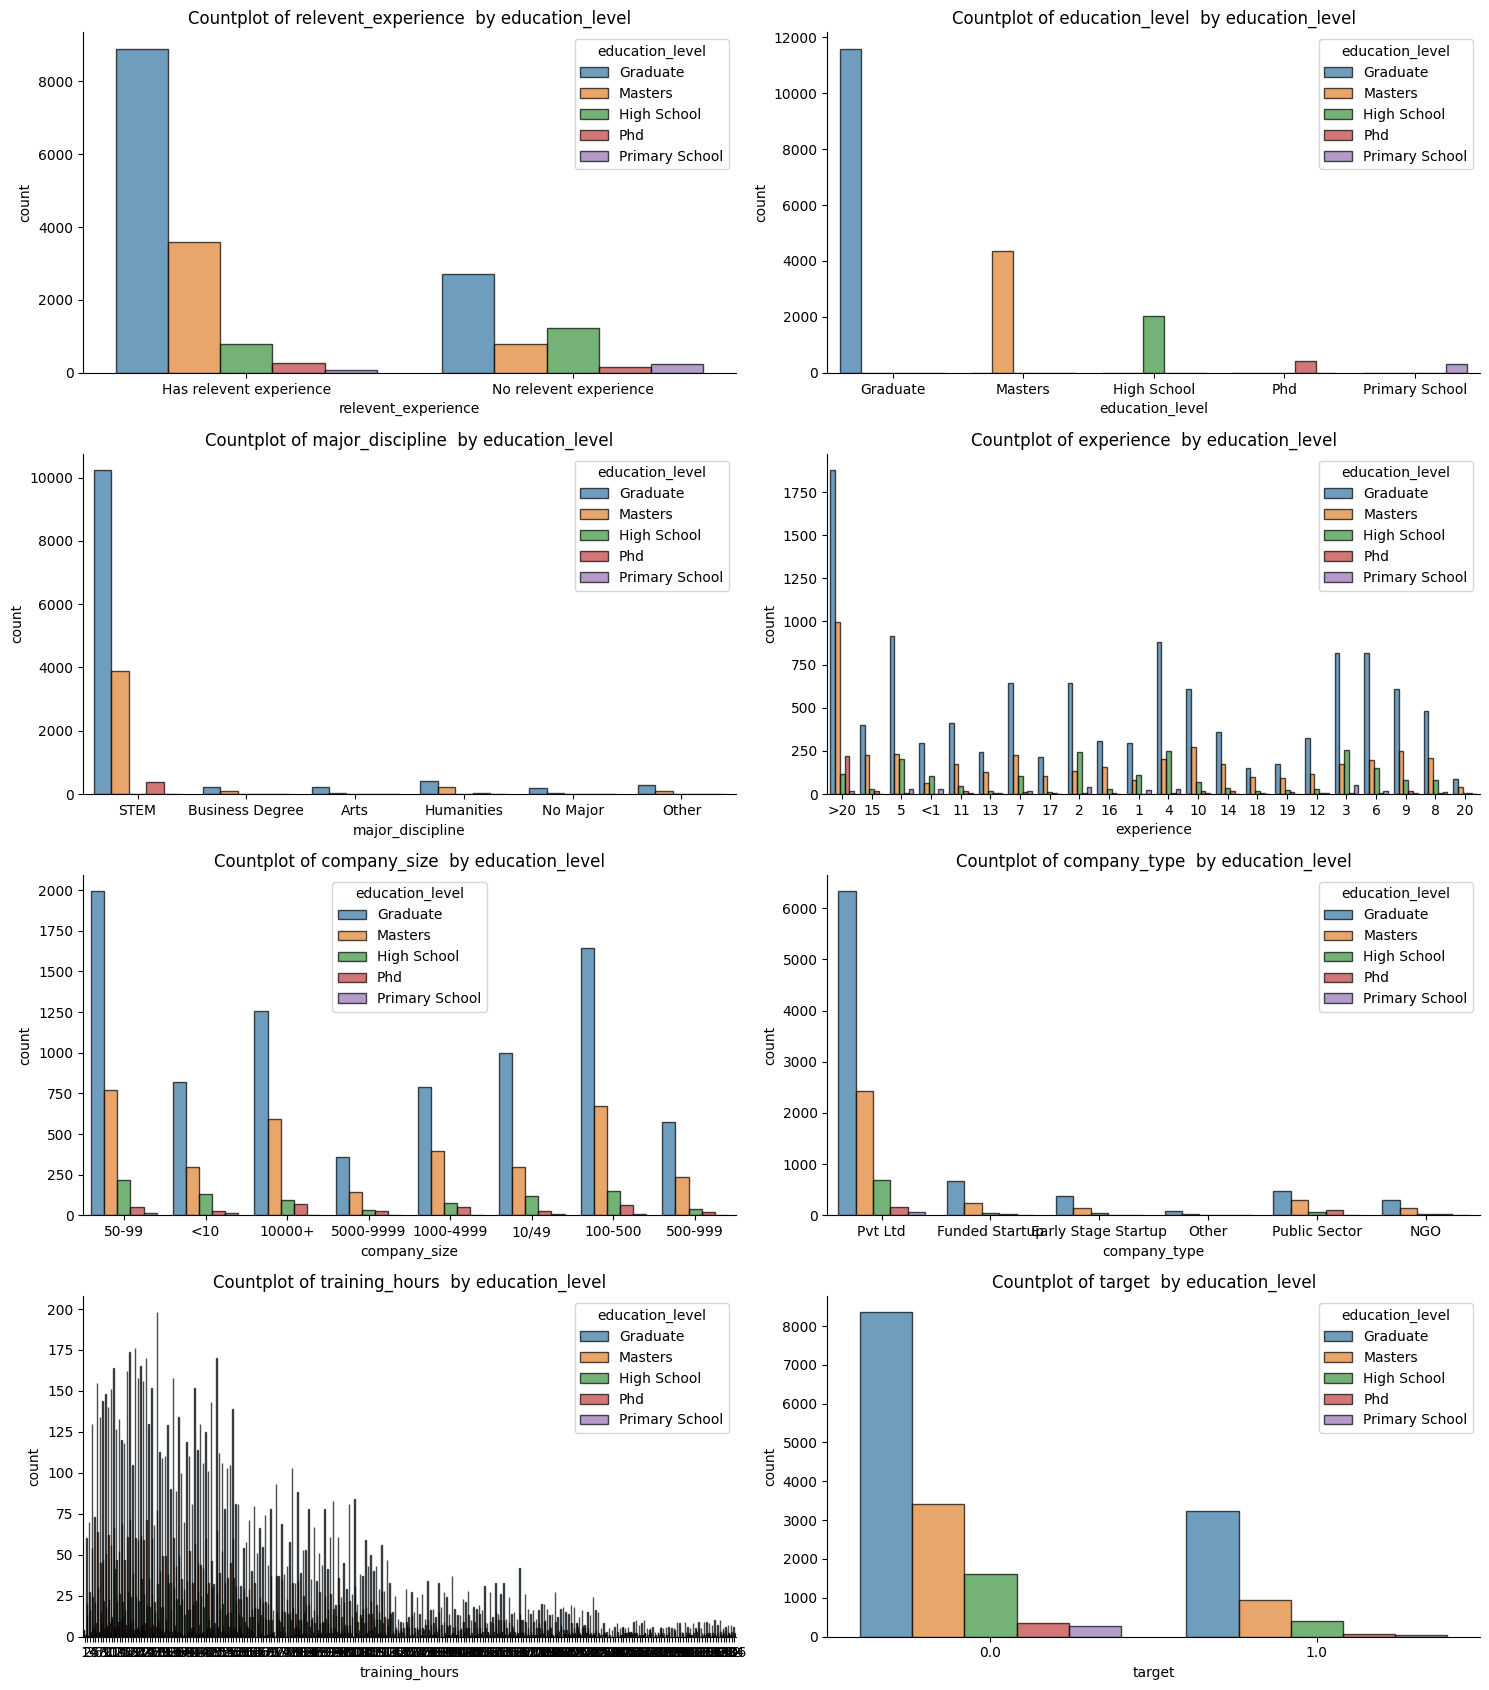

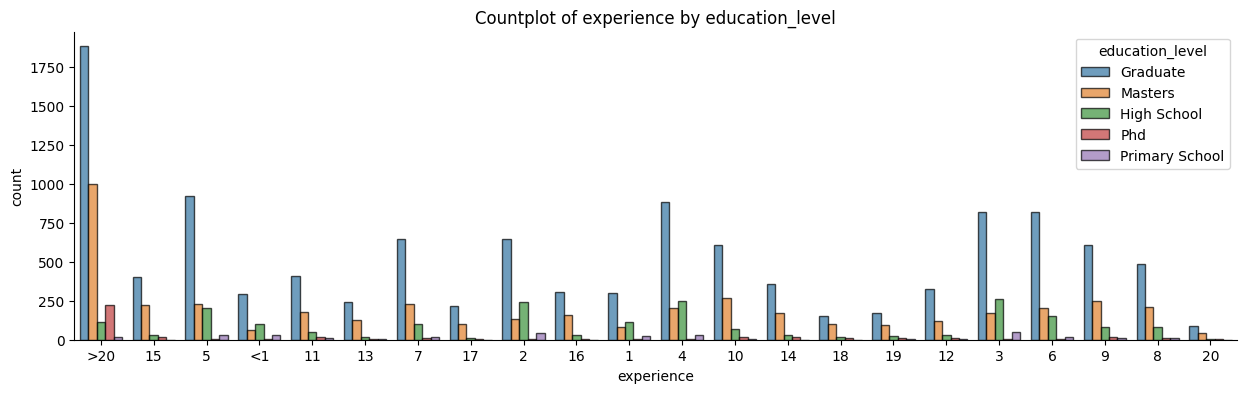

In [7]:
#barplots showing the frequency of each category separated by label
plt.figure(figsize=[15,17])
fft=["relevent_experience", "education_level","major_discipline", "experience","company_size","company_type", "training_hours","target"]
n=1
for f in fft:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='education_level', edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()



plt.figure(figsize=[15,4])
sns.countplot(x='experience', hue='education_level',edgecolor="black", alpha=0.7, data=df)
sns.despine()
plt.title("Countplot of experience by education_level")
plt.show()

## Target

- 0-Not looking for a job change
- 1-Looking for a job change

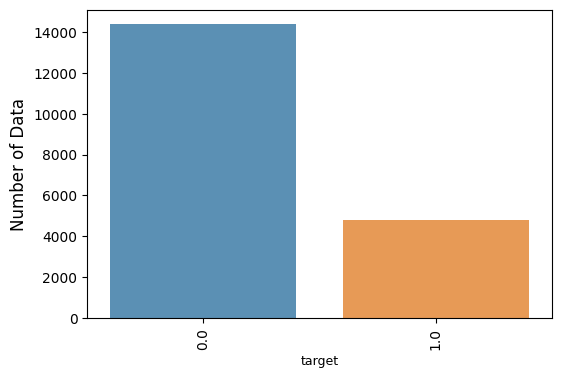

In [8]:
mnj = df['target'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=mnj.index, y=mnj.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
plt.show()

## Plotting correlations

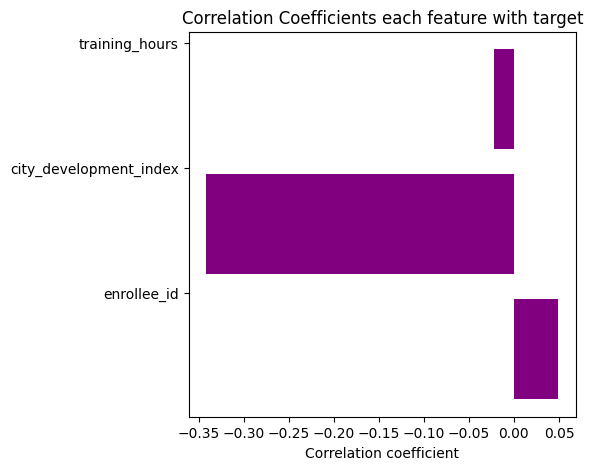

In [9]:
#plotting correlations
num_feat=df.columns[df.dtypes!=object]
num_feat=num_feat [:-1]
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.target.values)[0,1])

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(5,5))
rects = ax.barh(ind, np.array(values), color='Purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients each feature with target");

## Heatmap

<ipython-input-10-538fee5d28c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  "major_discipline", "experience", "company_size", "company_type", "last_new_job", "training_hours", "target"]].corr()


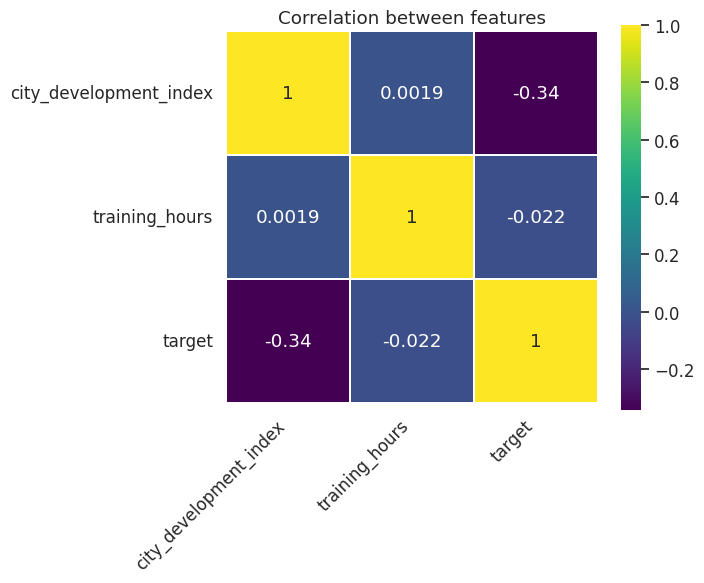

In [10]:
corrMatrix = df[["city", "city_development_index", "gender", "relevent_experience", "enrolled_university", "education_level",
                 "major_discipline", "experience", "company_size", "company_type", "last_new_job", "training_hours", "target"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(6, 5))

# Create the heatmap and rotate x-labels by 45 degrees
heatmap = sns.heatmap(corrMatrix, linewidths=0.01, square=True, annot=True, cmap='viridis', linecolor="white")

# Rotate x-labels by 45 degrees
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Correlation between features')
plt.show()


## Preprocessing

In [11]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0


In [12]:
# Creating a function that converts all values of needed attributes into numbers

def gender_to_numeric(x):
    if x=='Female': return 2
    if x=='Male':   return 1
    if x=='Other':   return 0

def rel_experience(x):
    if x=='Has relevent experience': return 1
    if x=='No relevent experience':   return 0

def enrollment(x):
    if x=='no_enrollment'   : return 0
    if x=='Full time course':   return 1
    if x=='Part time course':   return 2

# In education level column, Let's consider null values as 'High School' for the rows
# which have fill the 'enrolled_university' & 'major_discipline' columns.

def edu_level(x):
    if x=='Graduate'       :   return 0
    if x=='Masters'        :   return 1
    if x=='High School'    :   return 2
    if x=='Phd'            :   return 3
    if x=='Primary School' :   return 4

def major(x):
    if x=='STEM'                   :   return 0
    if x=='Business Degree'        :   return 1
    if x=='Arts'                   :   return 2
    if x=='Humanities'             :   return 3
    if x=='No Major'               :   return 4
    if x=='Other'                  :   return 5


def experience(x):
    if x=='<1'      :   return 0
    if x=='1'       :   return 1
    if x=='2'       :   return 2
    if x=='3'       :   return 3
    if x=='4'       :   return 4
    if x=='5'       :   return 5
    if x=='6'       :   return 6
    if x=='7'       :   return 7
    if x=='8'       :   return 8
    if x=='9'       :   return 9
    if x=='10'      :   return 10
    if x=='11'      :   return 11
    if x=='12'      :   return 12
    if x=='13'      :   return 13
    if x=='14'      :   return 14
    if x=='15'      :   return 15
    if x=='16'      :   return 16
    if x=='17'      :   return 17
    if x=='18'      :   return 18
    if x=='19'      :   return 19
    if x=='20'      :   return 20
    if x=='>20'     :   return 21

def company_t(x):
    if x=='Pvt Ltd'               :   return 0
    if x=='Funded Startup'        :   return 1
    if x=='Early Stage Startup'   :   return 2
    if x=='Other'                 :   return 3
    if x=='Public Sector'         :   return 4
    if x=='NGO'                   :   return 5

def company_s(x):
    if x=='<10'          :   return 0
    if x=='10/49'        :   return 1
    if x=='100-500'      :   return 2
    if x=='1000-4999'    :   return 3
    if x=='10000+'       :   return 4
    if x=='50-99'        :   return 5
    if x=='500-999'      :   return 6
    if x=='5000-9999'    :   return 7

def last_job(x):
    if x=='never'        :   return 0
    if x=='1'            :   return 1
    if x=='2'            :   return 2
    if x=='3'            :   return 3
    if x=='4'            :   return 4
    if x=='>4'           :   return 5

In [13]:
df['gender'] = df['gender'].apply(gender_to_numeric)
df['relevent_experience'] = df['relevent_experience'].apply(rel_experience)
df['enrolled_university'] = df['enrolled_university'].apply(enrollment)
df['education_level'] = df['education_level'].apply(edu_level)
df['major_discipline'] = df['major_discipline'].apply(major)
df['experience'] = df['experience'].apply(experience)
df['company_type'] = df['company_type'].apply(company_t)
df['company_size'] = df['company_size'].apply(company_s)
df['last_new_job'] = df['last_new_job'].apply(last_job)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  float64
 4   relevent_experience     19158 non-null  int64  
 5   enrolled_university     18772 non-null  float64
 6   education_level         18698 non-null  float64
 7   major_discipline        16345 non-null  float64
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  float64
 10  company_type            13018 non-null  float64
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(10), int64(3), object(1)
me

In [15]:
correlation_with_target = df.corr()['target'].sort_values(ascending=True)
print(correlation_with_target)

city_development_index   -0.341665
experience               -0.176724
relevent_experience      -0.128430
education_level          -0.091101
last_new_job             -0.082607
training_hours           -0.021577
major_discipline         -0.014854
company_size             -0.008695
gender                    0.018034
company_type              0.025326
enrollee_id               0.049475
enrolled_university       0.106561
target                    1.000000
Name: target, dtype: float64


<ipython-input-15-57d9e78390e7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df.corr()['target'].sort_values(ascending=True)


Considering the correlation

- city_development_index   -0.341665

- experience               -0.176724

- relevent_experience      -0.128430

- education_level          -0.090062

- last_new_job             -0.082607

will be considered for the model development.


In [16]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

### Fill 'education_level' column null values

In [17]:
# Fill null values in 'education_level' with 'High School' for rows where at least one of 'enrolled_university' or 'major_discipline' columns is not null
df.loc[df['enrolled_university'].notnull() | df['major_discipline'].notnull(), 'education_level'] = 2

In [18]:
# Fill remaining null values in 'education_level' with 4 (we assumed at least a person who applied for this job have completed atleast primary education)
df['education_level'].fillna(4, inplace=True)

### Fill 'experience' column null values

In [19]:
df.loc[df['last_new_job'].notnull() | df['company_type'].notnull() | df['company_size'].notnull(), 'experience'] = 0

In [20]:
df['experience'].fillna(0, inplace=True)

### 'last_new_job' column

In [21]:
mean_last_new_job = df.loc[df['company_type'].notnull() | df['company_size'].notnull() | df['relevent_experience'] == 1, 'last_new_job'].mean()
df['last_new_job'].fillna(mean_last_new_job, inplace=True)

In [22]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level              0
major_discipline          2813
experience                   0
company_size              5938
company_type              6140
last_new_job                 0
training_hours               0
target                       0
dtype: int64

## Drop Columns

In [23]:
columns_to_drop = ['city', 'training_hours', 'major_discipline', 'company_size', 'gender', 'company_type', 'enrollee_id', 'enrolled_university']
df = df.drop(columns=columns_to_drop)
df.head(2)

,city_development_index,relevent_experience,education_level,experience,last_new_job,target
0,0.920,1,2.0,0.0,1.0,1.0
1,0.776,0,2.0,0.0,5.0,0.0


In [24]:
# Convert the 'target' to integers
df['target'] = df['target'].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   relevent_experience     19158 non-null  int64  
 2   education_level         19158 non-null  float64
 3   experience              19158 non-null  float64
 4   last_new_job            19158 non-null  float64
 5   target                  19158 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 898.2 KB


In [26]:
df.head(2)

,city_development_index,relevent_experience,education_level,experience,last_new_job,target
0,0.920,1,2.0,0.0,1.0,1
1,0.776,0,2.0,0.0,5.0,0


In [27]:
df.isnull().sum()

city_development_index    0
relevent_experience       0
education_level           0
experience                0
last_new_job              0
target                    0
dtype: int64

In [28]:
df.corr()['target']

city_development_index   -0.341665
relevent_experience      -0.128430
education_level          -0.011064
experience                0.014959
last_new_job             -0.080730
target                    1.000000
Name: target, dtype: float64

In [29]:
df

,city_development_index,relevent_experience,education_level,experience,last_new_job,target
0,0.920,1,2.0,0.0,1.0,1
1,0.776,0,2.0,0.0,5.0,0
2,0.624,0,2.0,0.0,0.0,0
3,0.789,0,2.0,0.0,0.0,1
4,0.767,1,2.0,0.0,4.0,0
...,...,...,...,...,...,...
19153,0.878,0,2.0,0.0,1.0,1
19154,0.920,1,2.0,0.0,4.0,1
19155,0.920,1,2.0,0.0,4.0,0
19156,0.802,1,2.0,0.0,2.0,0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
X = df.drop('target', axis=1)  # Features
y = df['target']  # target variable

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
clf = DecisionTreeClassifier(random_state=42)

In [34]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
y_pred = clf.predict(X_test)

In [36]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [37]:
print(f"Accuracy: {accuracy:.2f}")
print('\n')
print("Confusion Matrix:")
print(conf_matrix)
print('\n')
print("Classification Report:")
print(classification_rep)

Accuracy: 0.76


Confusion Matrix:
[[2554  326]
 [ 575  377]]


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      2880
           1       0.54      0.40      0.46       952

    accuracy                           0.76      3832
   macro avg       0.68      0.64      0.65      3832
weighted avg       0.75      0.76      0.75      3832



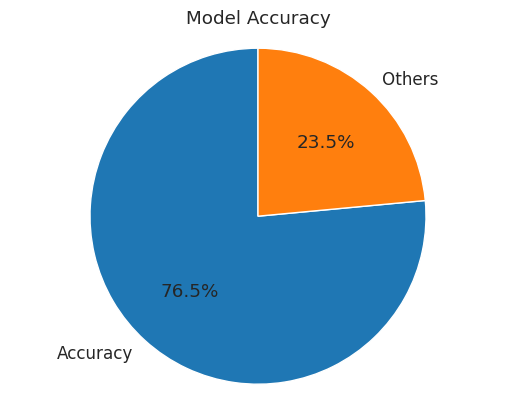

In [55]:
import matplotlib.pyplot as plt

# Define custom colors for the pie chart slices
colors = ['#1f77b4', '#ff7f0e']  # You can replace these with your preferred colors

# Plot accuracy as a pie chart with custom colors
labels = ['Accuracy', 'Other']
sizes = [accuracy, 1 - accuracy]

# Create a pie chart with custom colors
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

plt.title('Model Accuracy')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular

plt.show()


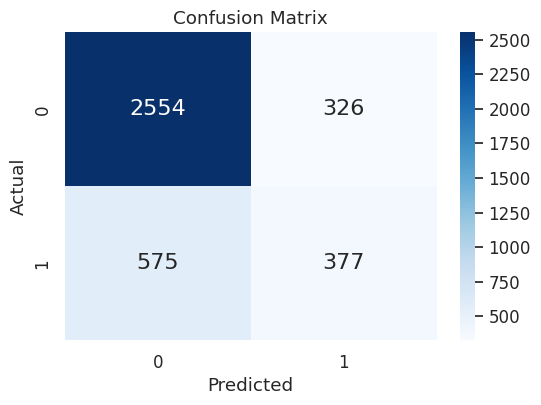

In [39]:
import seaborn as sns

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


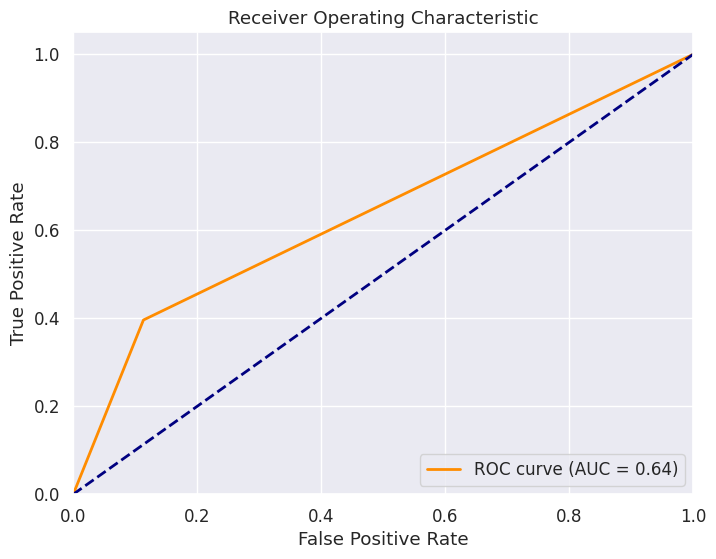

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


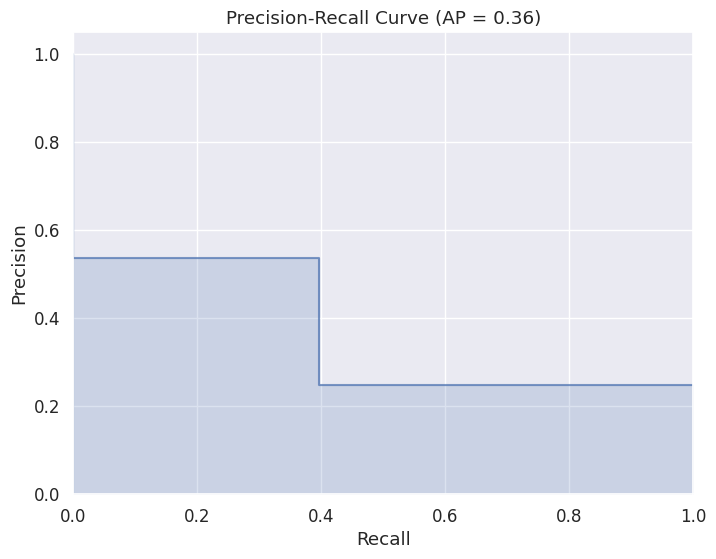

In [41]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate precision-recall curve and average precision score
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()


## test for aug_test dataset:

In [42]:
test_df = pd.read_csv('aug_test.csv')

In [43]:
test_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [44]:
# Apply the same transformations to the columns in 'test_df'
test_df['gender'] = test_df['gender'].apply(gender_to_numeric)
test_df['relevent_experience'] = test_df['relevent_experience'].apply(rel_experience)
test_df['enrolled_university'] = test_df['enrolled_university'].apply(enrollment)
test_df['education_level'] = test_df['education_level'].apply(edu_level)
test_df['major_discipline'] = test_df['major_discipline'].apply(major)
test_df['experience'] = test_df['experience'].apply(experience)
test_df['company_type'] = test_df['company_type'].apply(company_t)
test_df['company_size'] = test_df['company_size'].apply(company_s)
test_df['last_new_job'] = test_df['last_new_job'].apply(last_job)

In [45]:
test_df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,1.0,1,1.0,0.0,0.0,9.0,0.0,NaN,1.0,21
1,9858,city_103,0.920,2.0,1,0.0,0.0,0.0,5.0,NaN,0.0,1.0,98


In [46]:
# Fill null values in 'education_level' for 'test_df'
test_df.loc[test_df['enrolled_university'].notnull() | test_df['major_discipline'].notnull(), 'education_level'] = 2
test_df['education_level'].fillna(4, inplace=True)

# Fill null values in 'experience' for 'test_df'
test_df.loc[test_df['last_new_job'].notnull() | test_df['company_type'].notnull() | test_df['company_size'].notnull(), 'experience'] = 0
test_df['experience'].fillna(0, inplace=True)

# Calculate the mean of 'last_new_job' for rows where 'relevent_experience' is 1 (assuming this is similar to the training data)
mean_last_new_job_test = test_df.loc[test_df['company_type'].notnull() | test_df['company_size'].notnull() | test_df['relevent_experience'] == 1, 'last_new_job'].mean()

# Fill null values in 'last_new_job' for 'test_df' with the calculated mean
test_df['last_new_job'].fillna(mean_last_new_job_test, inplace=True)


In [47]:
test_df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level             0
major_discipline          312
experience                  0
company_size              622
company_type              634
last_new_job                0
training_hours              0
dtype: int64

In [48]:
# Columns to drop
columns_to_drop = ['city', 'training_hours', 'major_discipline', 'company_size', 'gender', 'company_type', 'enrollee_id', 'enrolled_university']

# Drop the specified columns from 'test_df'
test_df = test_df.drop(columns=columns_to_drop)

# Display the first few rows of 'test_df' to verify the changes
test_df.head(2)

,city_development_index,relevent_experience,education_level,experience,last_new_job
0,0.827,1,2.0,0.0,1.0
1,0.920,1,2.0,0.0,1.0


In [49]:
y_pred_test = clf.predict(test_df)

In [50]:
import pandas as pd

# Assuming you have already predicted the target values and stored them in 'y_pred_test'
# Create a DataFrame to store the results
results_df = pd.DataFrame({'Row': range(1, len(y_pred_test) + 1), 'Predicted_Target': y_pred_test})

# Display the results DataFrame
print(results_df)


       Row  Predicted_Target
0        1                 0
1        2                 0
2        3                 1
3        4                 0
4        5                 0
...    ...               ...
2124  2125                 0
2125  2126                 0
2126  2127                 0
2127  2128                 0
2128  2129                 0

[2129 rows x 2 columns]


In [51]:
results_df['Predicted_Target'].value_counts()

0    1736
1     393
Name: Predicted_Target, dtype: int64

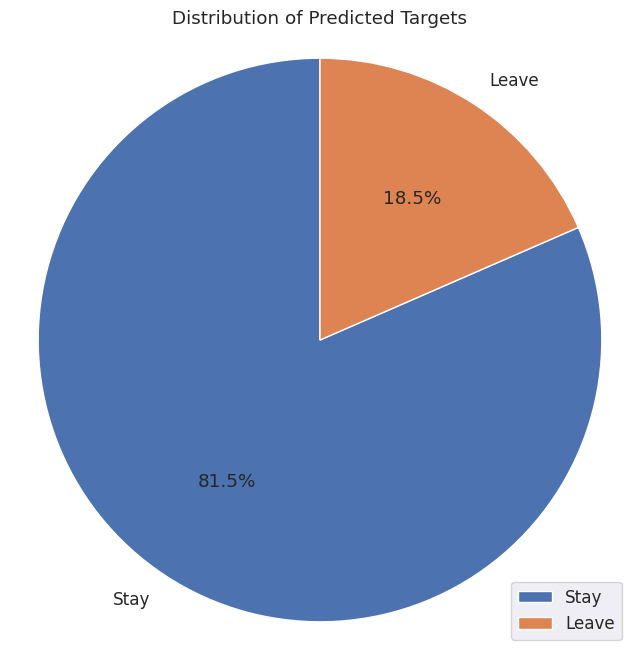

In [61]:
import matplotlib.pyplot as plt

# Calculate value counts for 'Predicted_Target' column
value_counts = results_df['Predicted_Target'].value_counts()

# Map values to corresponding labels
labels = ['Stay' if label == 0 else 'Leave' for label in value_counts.index]

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Set the legend with custom labels
plt.legend(labels, loc='lower right')

plt.title('Distribution of Predicted Targets')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()


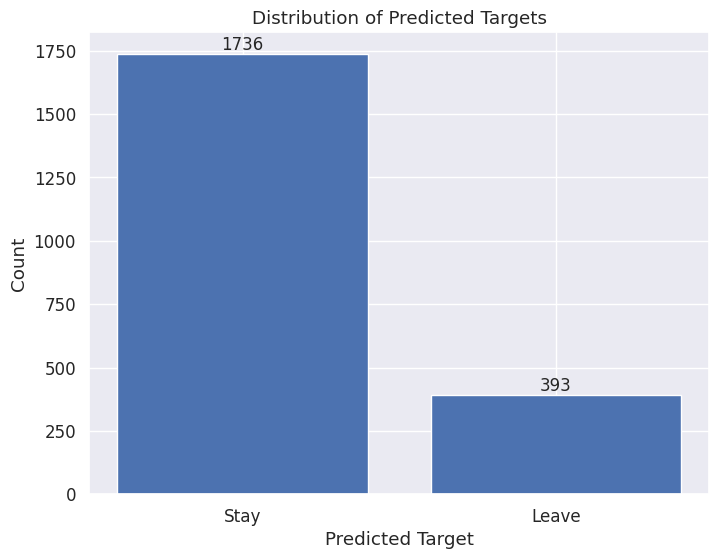

In [62]:
import matplotlib.pyplot as plt

# Calculate value counts for 'Predicted_Target' column
value_counts = results_df['Predicted_Target'].value_counts()

# Map values to corresponding labels
labels = ['Stay' if label == 0 else 'Leave' for label in value_counts.index]

# Create a barplot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.bar(labels, value_counts)

# Add data labels on top of each bar
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Predicted Targets')
plt.xlabel('Predicted Target')
plt.ylabel('Count')
plt.show()


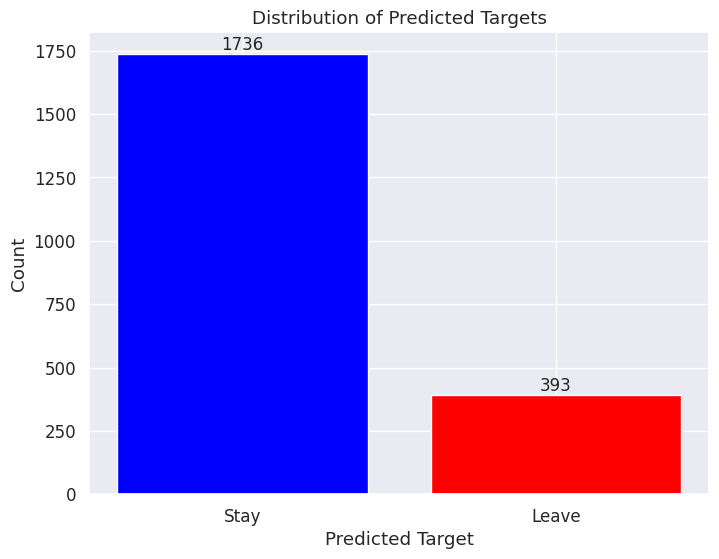

In [65]:
import matplotlib.pyplot as plt

# Calculate value counts for 'Predicted_Target' column
value_counts = results_df['Predicted_Target'].value_counts()

# Map values to corresponding labels
labels = ['Stay' if label == 0 else 'Leave' for label in value_counts.index]

# Define colors for 'Stay' and 'Leave' bars
colors = ['blue', 'red']

# Create a barplot with custom colors
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
bars = plt.bar(labels, value_counts, color=colors)

# Add data labels on top of each bar
for bar, count in zip(bars, value_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Predicted Targets')
plt.xlabel('Predicted Target')
plt.ylabel('Count')
plt.show()
